In [90]:
import cv2
import numpy as np
from IPython.display import display, Image, clear_output
import PIL.Image

In [91]:
video_path = 'WhatsApp Video 2023-12-02 at 10.27.37.mp4'
cap = cv2.VideoCapture(video_path)


In [92]:
fgbg = cv2.createBackgroundSubtractorMOG2()
min_contour_area = 1500

In [93]:
people_count = 0

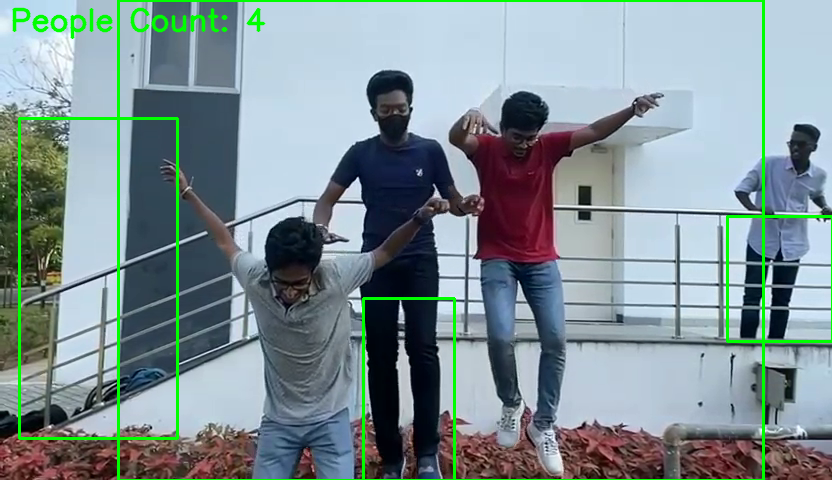

In [94]:
while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # Apply background subtraction for motion detection
    fgmask = fgbg.apply(frame)

    # Find contours in the mask
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Reset people count for each frame
    people_count = 0

    # Draw bounding boxes around detected regions
    for contour in contours:
        area = cv2.contourArea(contour)

        # Adjust the area threshold based on your scenario
        if area > min_contour_area:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            people_count += 1

    # Display the frame with bounding boxes and people count
    cv2.putText(frame, f'People Count: {people_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(frame))

    # Clear the previous output for the next frame
    clear_output(wait=True)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [89]:
cap.release()